## Tugas 1
Tuliskan program untuk menyelesaikan masalah Pasangan Titik Terdekat dengan strategi Exhaustive Search.

## Permasalahan

Ingat kembali bahwa dalam bidang Cartesius, jarak antar dua buah titik $P_1=(x_1,y_1)$ dan $P_2=(x_2,y_2)$ didefinisikan oleh jarak Euclid sebagai berikut:

$$
d(P_1,P_2) = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}.
$$

Dalam masalah ini, Anda akan diberikan input berupa dua buah vektor ```X``` dan ```Y``` yang masing-masing berukuran ```n``` dan berisi bilangan real. Dua buah vektor tersebut menyatakan ```n``` buah titik pada bidang Cartesius, yaitu ``` (x[0], y[0]), (x[1], y[1]), ... , (x[n-1], y[n-1])```. Anda diminta untuk menghasilkan output berupa **semua** pasangan titik yang memiliki jarak terdekat dari antara semua pasangan titik lainnya.

```
Input  : Two lists x and y of n (n≥2) points p1(x1,y1),...,pn(xn,yn)
Output : The distance between the closest pair of points and all pairs of points attaining that distance.
```

Berikut merupakan contoh Input dan Output permasalahan.

```
Input:
  2.0 -3.0 5.5 6.5 1.0 0.5 0
  0.0 5.5 1.5 -0.5 0.5 3.5 4.5

Output:
  1.118
  0 4
  5 6
```

Pada contoh di atas, jarak terpendek di antara semua pasangan titik adalah sebesar 1.118, yang dicapai oleh 2 buah pasangan titik:
1. Pasangan antara titik ke-0, yaitu (2,0) dan titik ke-4, yaitu (1, 0.5); dan
2. Pasangan antara titik ke-5, yaitu (0.5, 3.5) dan titik ke-6, yaitu (0, 4.5).

### Batasan Input

* Kedua list dijamin memiliki panjang yang sama, yaitu sebesar $n\ge 100000$.
* Isian titik koordinat pada masing-masing list merupakan bilangan real pada interval $[-1000, 1000]$.

### Persyaratan Kompleksitas
* Kompleksitas waktu $=\mathcal{O}(n^2)$
* Kompleksitas memori $=\mathcal{O}(n)$

In [ ]:
import math


def closest_pair_of_points(x, y):
    length = len(x)
    storage_to_check = []   # Tempat menampung titik-titik terpendek

    # Lakban
    if length <= 1:
        return f"Invalid input please try again"

    # Mulai dari jarak titik pertama dan kedua
    minimum_distance = math.sqrt((x[0] - x[1])**2 + (y[0] - y[1])**2)

    # Pakai Metode Selection Sort
    for i in range(length - 1):
        p_1 = [x[i], y[i]]

        for j in range(i + 1, length):
            p_2 = [x[j], y[j]]
            first_counting = (p_1[0] - p_2[0])**2 + (p_1[1] - p_2[1])**2
            second_counting = math.sqrt(first_counting)

            # Bandingkan jarak yang dicari dengan jarak sebelumnya
            if second_counting < minimum_distance:
                minimum_distance = second_counting  # Kalau lebih kecil, dia jadi patokan
                storage_to_check.clear()    # Hapus storage lama

            # Kalau ada lebih dari 1 titik dengan jarak terkecil, simpen
            if second_counting == minimum_distance:
                storage_to_check.append((i, j))

    # Simpan jarak terpendek di akhir
    storage_to_check.append(minimum_distance)
    return storage_to_check


def main():
    x = [2.0, -3.0, 5.5, 6.5, 1.0, 0.5, 0]
    y = [0.0, 5.5, 1.5, -0.5, 0.5, 3.5, 4.5]

    list_of_closest_points = closest_pair_of_points(x, y)

    # Cek validitas output
    if isinstance(list_of_closest_points, str) != True:

        # print jarak terpendeknya (dibulatkan 3 angka belakang koma)
        print(round(list_of_closest_points[-1],3))

        # print index titik-titiknya
        for i in range(len(list_of_closest_points)-1):
            print(f"{list_of_closest_points[i][0]} {list_of_closest_points[i][1]}")
    else:
        print(list_of_closest_points)      # Jika input tidak valid


if __name__ == '__main__':
    main()

1.118
0 4
5 6


## Tugas 2

Tulislah program penyelesaian masalah Mencari Harta Karun dengan menggunakan strategi DFS dan/atau BFS.

### Permasalahan

Sebuah ladang berukuran $n\times n$ petak, pada masing-masing petaknya tersimpan harta karun dengan nilai yang berbeda-beda. Sebuah robot bergerak dari posisi ujung kiri atas menuju ujung kanan bawah untuk mengumpulkan harta karun dari setiap petak yang dilewatinya. Namun demikian, arah gerak robot tersebut terbatas hanya 2 kemungkinan saja: bergerak ke kanan (```K```) atau ke bawah (```B```) saja.

Diberikan matriks berukuran $n\times n$ berisi bilangan bulat nonnegatif yang menggambarkan besarnya harta karun dari masing-masing petak ladang. Tuliskan program untuk menghitung total harta karun terbesar yang bisa diraih serta rute terbaik yang sebaiknya dijalankan oleh robot untuk memperoleh total harta tersebut. Gunakan strategi DFS dan BFS untuk menyelesaikan masalah ini.

```
Input  : A matrix H depicting treassure values of each of n x n soil blocks.
Output : The total value of greatest possible treassures collected as well as all possible routes to achieve.
```

Berikut merupakan contoh Input dan Output permasalahan.

```
Input:
  5 9 1 7
  2 13 3 21
  9 12 1 10
  8 2 1 6

Output:
  67
  KBKKBB
```

Pada contoh di atas, $n=4$ dan matriks petak harta karun adalah sebagai berikut:

$$
H=\begin{bmatrix}
5 & 9 & 1 & 7\\
2 & 13 & 3 & 21\\
9 & 12 & 1 & 10\\
8 & 2 & 1 & 6\\
\end{bmatrix}
$$

Maka, banyaknya harta karun terbesar yang dapat dikumpulkan oleh robot adalah 67, dengan rute perjalanan ```KBKKBB```, yaitu seperti diilustrasikan oleh angka berwarna merah pada matriks di bawah ini.

$$
H=\begin{bmatrix}
{\color{red}5} & {\color{red}9} & 1 & 7\\
2 & {\color{red}1\color{red}3} & {\color{red}3} & {\color{red}2\color{red}1}\\
9 & 12 & 1 & {\color{red}1\color{red}0}\\
8 & 2 & 1 & {\color{red}6}\\
\end{bmatrix}
$$

### Batasan Input

* Input dijamin dalam bentuk matriks berukuran persegi $n\times n$ dengan $n\le 15$.
* Isian pasa setiap elemen matriks merupakan bilangan bulat positif pada interval $[1, 100]$.

### Persyaratan Kompleksitas
* Kompleksitas waktu $=\mathcal{O}\left[{2n \choose n}\right]$
* Kompleksitas memori $=\mathcal{O}(n^2)$





In [2]:
# Global Variabel untuk value terbesar
max_val = 0

def dfs(matrix, n, row, col, val, path):
    global max_val, max_val_path_list       # Variabel global

    # Langkah basis
    if (row,col) == (n-1,n-1):  # Pasti selesai di matrix[n-1][n-1]
        # Cari value terbesar
        if val > max_val:
            max_val = val
            max_val_path_list = path

    # Langkah Rekursif

    # Langkah ke bawah
    if row < n-1:
        new_row = row+1     # turun
        path.append("B")    # masukin ke path
        val += matrix[new_row][col]     # Tambahin value nya
        dfs(matrix,n,new_row,col,val,list(path))    # rekursif
        path.pop()  # hapus path terakhir untuk diganti
        val -= matrix[new_row][col] # kurangi total value dengan value terakhir (bersamaan dengan path)

    # Langkah ke kanan
    if col<n-1:
        new_col = col+1     # ke kanan
        path.append("K")    # masukin ke path
        val += matrix[row][new_col]     # Tambahin valuenya
        dfs(matrix,n,row,new_col,val,list(path))    # Rekursif
        path.pop()
        val -= matrix[row][new_col]

def main():
    H = [[5,9,1,7],[2,13,3,21],[9,12,1,10],[8,2,1,6]]       # Matrix yang digunakan
    n = len(H)
    row = 0
    col = 0
    path = []
    val = H[0][0]

    # Mencari harta karun terbesar dan jaraknya
    dfs(H,n,row,col,val,path)

    # Mengubah isi dari list ke string
    final_path = ''
    for path in max_val_path_list:
        final_path += path

    # Hasil final
    print(max_val)
    print(final_path)


if __name__ == '__main__':
    main()

67
KBKKBB


## Tugas 3

Tulislah program penyelesaian masalah Pemancar BTS dengan memilih strategi yang terbaik antara DFS atau BFS.

### Permasalahan

Pertama-tama, diberikan 4 buah bilangan bulat $N, M, P, R$. Diberikan pula sebuah graf terhubung $G$ dengan $N$ titik dan $M$ sisi. Inputan berupa edge list berukuran $M$ dan masing-masing titik dilabeli index ```0, 1, ... , N-1```. Graf tersebut menggambarkan posisi kota-kota di sebuah negara dengan struktur ketetanggaan tertentu. $P$ kota di antaranya direncanakan untuk diberikan pemancar BTS. Sebuah pemancar dapat memberikan konektivitas pada kota-kota yang berjarak tidak lebih dari $R$ dari titik pemancar.

Anda diminta untuk mencari tahu apakah ada kota-kota yang masih belum menerima konektivitas dari pemancar BTS.

### Format dan Batasan Input

* Baris pertama: 4 buah bilangan bulat positif $N, M, P, R$.
  * Batasan: $N\le 100, M\le {N\choose 2}, P\le N, 1\le R \le N-1$.
* Baris ke 2 s.d $M+1$: masing-masing berisi 2 bilangan bulat $u_i,v_i$ menandakan bahwa kota $u_i$ bertetangga dengan kota $v_i$; untuk $i=1, 2, \dots, M$.
  * Batasan: dijamin $u_i\neq v_i$ dan $0\le u_i,v_i\le N-1$.
  * Dijamin graf yang dihasilkan dari edge list ini adalah graf sederhana (tidak ada loop dan sisi berulang) dan terhubung
* Baris ke $M+2$ s.d. $M+2+P-1$: berisi sebuah bilangan bulat $P_i$ menandakan bahwa kota berlabel $P_i$ akan dipasang pemancar.

### Format Output

* Baris pertama: bilangan bulat $Q$, menandakan bahwa masih terdapat $Q$ kota yang tidak menerima konektivitas.
* Baris kedua (jika $Q>0$): berupa $Q$ buah bilangan bulat terurut naik yang menandakan label kota-kota yang masih belum menerima konektivitas.

### Contoh Input 1

```
8 7 2 2
0 1
1 2
2 3
3 4
4 5
5 6
6 7
1
7
```

### Contoh Output 1

```
1
4
```

### Contoh Input 2

```
8 7 1 1
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0
```

### Contoh Output 2

```
0
```

### Penjelasan

Untuk Input dan Output 1, graf berbentuk demikian:

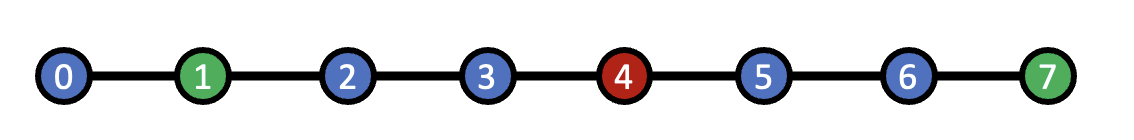

di mana titik berwarna hijau adalah lokasi pemancar, biru adalah kota yang berdekatan yang menerima konektivitas dan merah adalah kota yang tidak menerima konektivitas karena terlalu jauh dari jangkauan pemancar.



### Persyaratan Kompleksitas
* Kompleksitas waktu $=O(N^{R+1})$
* Kompleksitas memori $=O(N^2)$

In [3]:
N, M, P, R = map(int, input("Masukkan 4 bilangan sebagai pemisah (Dengan Spasi): ").split()) # Input User N, M, P, R

graph = [] # Pembuatan variabel kosong untuk mennyimpan graph
for _ in range(N):
    graph.append([])


for _ in range(M): # Menghubungkan edge dengan titik didalam list..!
    u, v = map(int, input("Masukkan relasi antara 2 titik (Dengan Spasi): ").split())
    graph[u].append(v)
    graph[v].append(u)

transmitter_cities = [] # Pencatatan Titik Transmitter
for _ in range(P):
    transmitter_cities.append(int(input("Masukkan titik yang menjadi pemancar: "))) # Memasukan titik transmitter

def dfs(node, depth): # Pencarian DFS
    visited[node] = True # node visited true karena dia itu udah visited diri sendiri
    for neighbor in graph[node]:
        if not visited[neighbor] and depth < R: # Validasi apakah dia sudah dicek atau belum dan apakah depthnya tidak lebih dari R
            dfs(neighbor, depth + 1) # Mengecek tetangganya dan menambah depthnya..!

not_connected_cities = [] # Membuat list kosong untuk menyimpan titik yang tidak terhubung.
depth = 0  # Pancaran radius dihitung sebagai depth dari transmitter_cities
for city in range(N):
    if city not in transmitter_cities:
        visited = [False] * N # Bikin list visited buat setiap kota untuk ngecheck udah pernah divisit belum kotanya
        dfs(city, depth)
        connected_to_transmitter = False
        for c in transmitter_cities: # Perulangan setiap kota dalam list transmitter cities
            if visited[c]: # Kalau isinya True
                connected_to_transmitter = True # Maka bener..!
                break
        if not connected_to_transmitter: # Kalo false maka
            not_connected_cities.append(city) # Masuk ke list not_connected_cities

Q = len(not_connected_cities) # Berapa banyak kota yang tidak terkena pancaran sinyal
print(Q)
if Q > 0: # Kalau misalnya Banyak kota lebih dari 0
    print(" ".join(map(str, not_connected_cities)))

1
4
